## Analysis

* Propriva appeared to have the least amount of tested mice, compared to Capomulin & Ramicane which had the most amount of tested mice 
* Mouse ID g989 was omitted due to duplicate/bad data 
* There were more male mice than female, but they were pretty well balanced 
* As seen in the line graph below, Capomulin had excellent effect for mouse l509
* The dataset had a surprisingly low amount of outliers - indicating the data was collected well

In [646]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")


# Display the data table for preview
combined_data.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [647]:
# Checking the number of mice.
mouse_count = len(pd.unique(combined_data["Mouse ID"]))
mouse_count

249

In [648]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


#^^^
#We are using the .loc method to slice the dataframe based on a condition:

#Where Mouse ID and Timepoint are duplicated.

#And we are grabbing the unique values from the Mouse ID column

array(['g989'], dtype=object)

In [649]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouseID = combined_data.loc[(combined_data['Mouse ID'] == 'g989'), :]
duplicates_mouseID.tail(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [650]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index, inplace = True)

In [651]:
#combined_data[combined_data.eq('g989').any(1)]
  # ^^ verifying that g989 has been removed 
combined_data.to_csv('combined_data.csv')

In [652]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [653]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(pd.unique(combined_data["Mouse ID"]))
mouse_count

248

## Summary Statistics

In [654]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_vol = combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_vol = combined_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_vol = combined_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev_tumor_vol = combined_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stderr_tumor_vol = combined_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_vol,
    "Median Tumor Volume":median_tumor_vol,
    "Tumor Volume Variance":variance_tumor_vol,
    "Tumor Volume Std. Dev.":stdev_tumor_vol,
    "Tumor Volume Std. Err.":stderr_tumor_vol
    
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [655]:


adv_method = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

adv_DF = combined_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
adv_DF.head()

#use group by function -> then .agg






Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

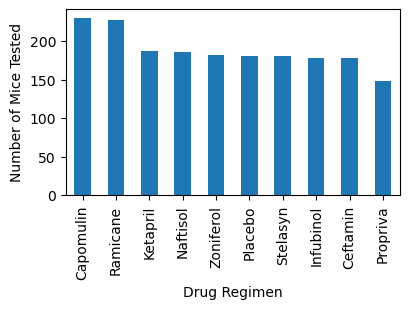

In [656]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# use value counts of diff drug regimen from overall merged DF -> use that to make series and call them in the counts.plot 


counts = combined_data['Drug Regimen'].value_counts()
counts
counts.plot(kind='bar',figsize=(4,3))
plt.title
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


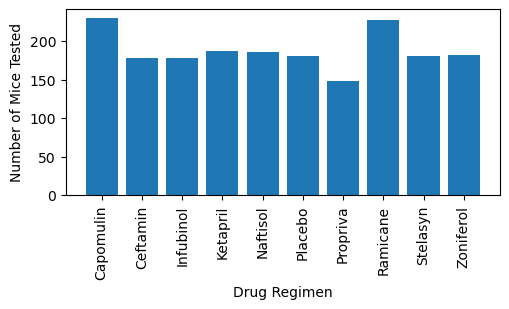

In [671]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


plt.figure(figsize=(5,3))



count_regimen_types = combined_data.groupby('Drug Regimen')
count_regimens = count_regimen_types['Drug Regimen'].count()


plt.bar(count_regimens.index,count_regimens.values, align='center')


plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


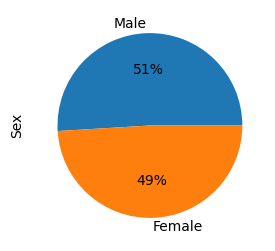

In [672]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = combined_data["Sex"].value_counts()

sex_counts.plot(kind='pie',autopct='%1.0f%%',figsize=(3,3))
plt.show()


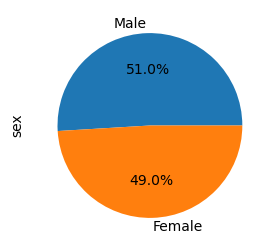

In [673]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = combined_data["Sex"].value_counts()
sex_counts
labels = ["Male","Female"]
plt.pie(sex_counts,labels=labels,autopct="%1.1f%%")
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [613]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

group_mouseID = combined_data.groupby("Mouse ID")
#group_mouseID.head()


# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = group_mouseID.max()["Timepoint"]

#reset the indexes
greatest_timepoint.reset_index(drop=True)
greatest_timepoint.head(19)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


merged_combined_data = pd.merge(greatest_timepoint,combined_data,on=["Mouse ID","Timepoint"],how='left')



In [615]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)


tumor_vols = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
merged_combined_data.head()




for drug in four_treatments:
    final_tumor_vol = merged_combined_data.loc[merged_combined_data["Drug Regimen"] ==drug,"Tumor Volume (mm3)"]
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    tumor_vols.append(final_tumor_vol)
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    #print(lowerq)
    #print(upperq)
    #print(iqr)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(lower_bound)
    #print(upper_bound)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) |( final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}")


    #!!! outliers are when its lower than the lower bound OR greater than the upper bound





    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


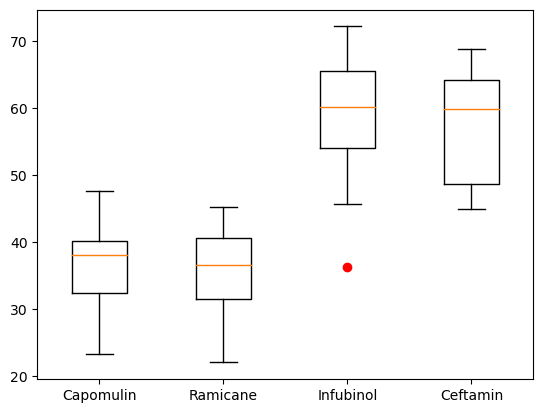

In [616]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_vols,sym='r')
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol", "Ceftamin"])
plt.show()

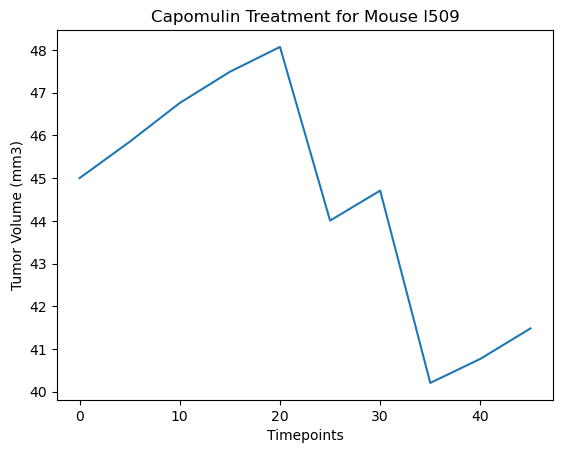

In [675]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capo_mice = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capo_mice.head(20)

mouse_l509 = capo_mice.loc[combined_data["Mouse ID"]== "l509"]
l509_tumor_x_time = mouse_l509.loc[:,["Timepoint","Tumor Volume (mm3)"]]


l509_tumor_x_time.set_index('Timepoint',inplace=True)
l509_tumor_x_time.reset_index(drop=True)

plt.plot(l509_tumor_x_time)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse l509")
plt.show()

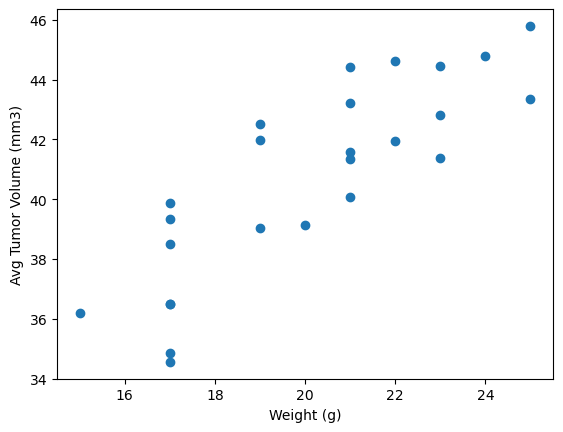

In [677]:
## Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capo_tumor_weight = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
yvalue = capo_tumor_weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

xvalue = capo_tumor_weight.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(xvalue,yvalue)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


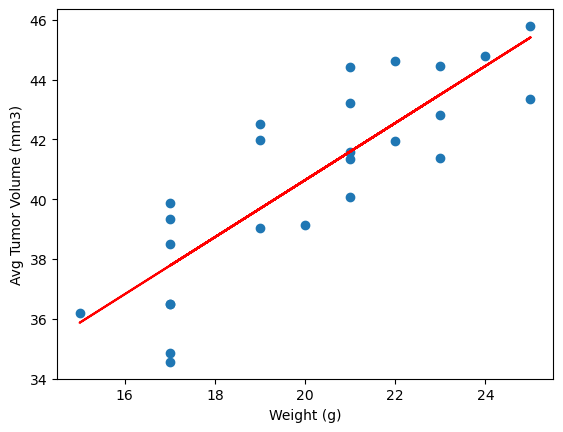

In [678]:
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xvalue,regress_values,"r-")
plt.scatter(xvalue,yvalue)

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()